#                                          超市零售商品数据分析

李云溪 22019207060

## 1.背景与需求

本文主要对一家超市2018年6月1日到2018年7月5日商品的销售数据进行销售情况分析、商品情况分析和用户情况分析，并给出提升销量的建议。<br/>
其中销售情况分析包括销售额、销量、和市场布局等情况分析；<br/>
商品情况分析包括优势商品等情况分析；<br/>
用户情况分析包括客户数量、新老客户、客单价、RFM模型、复购率和回购率等情况分析。

## 2.数据预处理

### 2.1导入所需要的模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


### 2.2导入数据并进行数据清洗

### 2.2.1导入market数据并进行数据清洗

In [2]:
basket=pd.read_csv("Basket-2018-06-01-2018-07-05.csv")#导入数据
basket.isnull()#查看所有缺失值
basket2=basket.dropna()#删除缺失值

In [3]:
#数据分布情况
basket2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


由数据分布情况表可以看出BASK_SPEND字段存在负值，需要对数据进行清洗，剔除异常数据。

In [4]:
basket2=basket2[basket2['BASK_SPEND']>0]  #剔除basket中bask_spend列小于0的行

In [5]:
basket2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,569797.000000,569797.000000,569797.000000
mean,2.994330,167572.136898,39.583197
std,2.502507,87224.915886,196.158166
min,1.000000,961.000000,0.010000
25%,1.000000,90673.000000,9.000000
50%,2.000000,177692.000000,20.000000
75%,3.000000,238933.000000,44.800000
max,20.000000,323914.000000,79920.000000


剔除异常值后的数据分布正常，并由数据分布情况可以分析出：<br/>
1.各门店2018年6月1日到2018年7月5日期间最小订单的金额为0.01元。<br/>
2.各门店2018年6月1日到2018年7月5日期间最大订单的金额为79920元。<br/>
3.所有门店2018年6月1日到2018年7月5日所有订单的品骏订单金额为39.58元。<br/>

将下单日期改为datetime类型，并为了后续分析新增年份列月分列以及日期列

In [6]:
basket2["SHOP_DATETIME"] = pd.to_datetime(basket2["SHOP_DATETIME"])#将下单日期改为datetime类型
basket2['year'] = basket2["SHOP_DATETIME"].dt.year
basket2['month'] = basket2['SHOP_DATETIME'].dt.month
basket2['day']= basket2['SHOP_DATETIME'].values.astype('datetime64[D]')

In [7]:
basket2

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,year,month,day
0,2018-06-01,D007,3,250458,8.00,2018,6,2018-06-01
1,2018-06-01,D007,3,250200,32.70,2018,6,2018-06-01
2,2018-06-01,D007,1,161068,16.80,2018,6,2018-06-01
3,2018-06-01,D007,8,5325,30.40,2018,6,2018-06-01
4,2018-06-01,D007,8,5361,191.30,2018,6,2018-06-01
...,...,...,...,...,...,...,...,...
571547,2018-07-05,A010,2,284211,34.71,2018,7,2018-07-05
571548,2018-07-05,A010,2,284601,44.80,2018,7,2018-07-05
571549,2018-07-05,A010,2,284241,6.50,2018,7,2018-07-05
571550,2018-07-05,A010,2,284352,15.90,2018,7,2018-07-05


### 2.2.2导入iterm数据并进行数据清洗

导入数据，并将下单日期改为datetime类型，并查看是否有缺失值

In [8]:
item=pd.read_csv("item.csv")
item['SDATE']=pd.to_datetime(item['SDATE'])
item.isnull().any()#查看所有缺失值

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

In [9]:
item.describe()#查看数据分布情况

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


从数据分布情况表可以看出：<br/>
1.ITEM_SPEND字段有负值，即商品实付金额为负，存在异常值；<br/>
2.ITEM_QUANTITY字段有负值，即商品数量为负，存在异常值；<br/>
3.DISCOUNT_AMOUTN字段数据有正值，即折扣后金额比折扣前金额高，存在异常值。

剔除异常值

In [10]:
item1=item[item['ITEM_SPEND']>0] #剔除item中ITEM_SPEND列小于0的行
item1=item1[item1['ITEM_QUANTITY']>0]#剔除item中ITEM_QUANTITY列小于0的行
item1=item1[item1['DISCOUNT_AMOUNT']<=0]#剔除item中DISCOUNT_AMOUNT列大于0的行
item1

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,-0.5


In [11]:
item1.duplicated().sum()#查看是否有重复值

212634

In [12]:
item2 = item1.drop_duplicates(keep='first')#去掉重复行，并保留重复出现的行中第一次出现的行
item2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


# 3.销售额分析

## 3.1每日销售额求和 

In [13]:
# 整体销售情况子数据集，包含下单日期、销售额、年份、月份信息
sales_data = basket2[['SHOP_DATETIME','BASK_SPEND','month','day']]
#按照月份及日期对销售子数据集进行分组求和
sales_day = sales_data.groupby(['month','day']).sum()
sales_day.style.background_gradient()# 颜色越深，销售额越高
#按周六日呈周期性递增态势

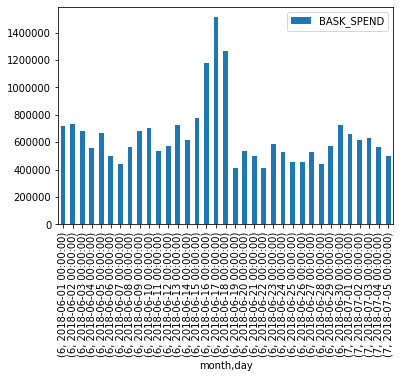

In [14]:
sales_day.plot(kind='bar')

由上图可以看出2018年6月16日-2018年6月18日的销售额明显高于其他日期的销售额，并在6月17日这天销售额最高，经查阅日历发现，2018年6月16日-2018年6月18日为三天端午假期，并且6月18日为端午节，大家多会提前一天前往商场采购端午节家庭聚餐所需要的食材或者走亲访友的礼物。因此端午节前一天的销售总额最高。<br/>
同时也可以观察出每日的销售总额呈现出一种7天为一个周期的波动态势，并且周六日的销售额明显攀升。<br/>
因此，该超市应注意节假日的仓库货物存储情况，提前备好足够库存的产品，以应对节假日增高的购买量。

##  3.2按商店的销售额分析

计算各门店的销售总额以及其销售额占比，并将结果排序

In [15]:
Market_Sales = basket2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)
Market_Sales["percent"] = Market_Sales["BASK_SPEND"] / basket2["BASK_SPEND"].sum()
Market_Sales.style.background_gradient()

,STORE_CODE,BASK_SPEND,percent
0,A001,3478347.859999,0.154220
15,D002,3177384.759999,0.140877
20,D007,1382203.010000,0.061283
4,A008,1324641.100000,0.058731
8,A013,1126550.930000,0.049948
2,A006,943923.310000,0.041851
7,A012,854660.960000,0.037893
17,D004,815338.800000,0.036150
19,D006,814436.490000,0.036110
5,A009,805212.890000,0.035701


绘制各门店销售总额柱状图

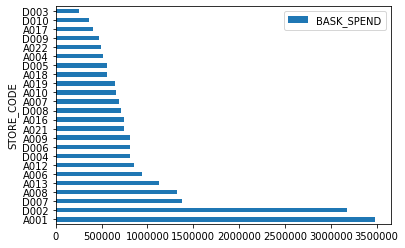

In [16]:
a=basket2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
a.set_index('STORE_CODE',inplace=True)
a.plot(kind='barh')

由上表以及上图可以看出:
1.A001门店以及D002门店的销售额远远超于其他门店的销售额，并且两门店的销售总额占到所有门店销售总额的30%；<br/>
2.D010以及D003门店销售额较低值得警惕。<br/>

## 3.3商店按结账频数统计 

汇总各门店的结账频数，并按从大到小的顺序进行排列

In [17]:
basket2.loc[:,'STORE_CODE'].value_counts()#商店按结账次数大小排序

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

绘制各门店结账频数的柱状图

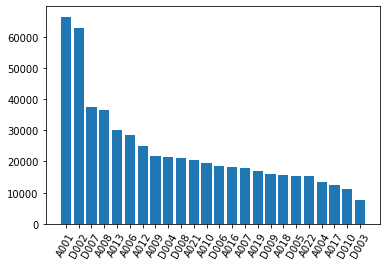

In [18]:

count =basket2.loc[:,'STORE_CODE'].value_counts()
name = list(count.index)
plt.bar(np.arange(len(name)), count)
# 设置横坐标
plt.xticks(np.arange(len(name)), name, rotation=60)   # rotation 旋转横坐标标签
plt.show()

综合对比各门店的结账次数以及销售总额柱状图可以发现，结账的次数与销售额是成正比的。<br/>
由此可以分析出零售产业通过吸引更多的顾客来增加销售额是一种非常有效的手段。

# 4.顾客分析

## 4.1顾客消费金额分析

查看数据中是否有离群点，并剔除离群点

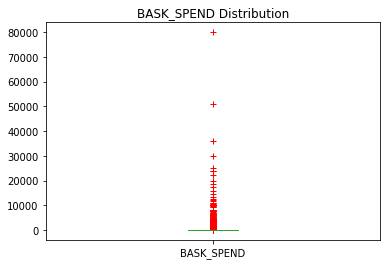

In [19]:
datatemp2=basket2["BASK_SPEND"]
datatemp2.plot(kind='box',title='BASK_SPEND Distribution',sym='r+');

根据剔除离群点后的数据绘制单笔订单消费金额的频数分布直方图

(array([287136., 124141.,  61781.,  33267.,  20008.]),
 array([1.0000e-02, 2.0006e+01, 4.0002e+01, 5.9998e+01, 7.9994e+01,
        9.9990e+01]),
 <a list of 5 Patch objects>)

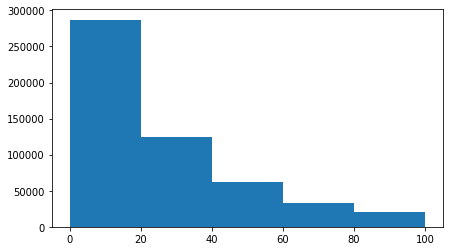

In [20]:
basket3=basket2[basket2['BASK_SPEND']<100]  #剔除离群点
dataset1 = basket3["BASK_SPEND"]
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(dataset1, bins=5)

由单笔订单金额的频数分布直方图可以观察到：单笔消费20元以内的订单数最多，即该超市的消费客户主要以购买小型商品为主，并且喜欢进行少量多次的消费。<br/>
因此可以分析得到顾客前往此商店的目的多是进行应急物品的购买，商店应选择应急物品为主要销售内容。

## 4.2顾客第一次消费时间分析

In [21]:
item2['year'] = item2['SDATE'].dt.year          
item2['month'] = item2['SDATE'].dt.month
item2['day']= item2['SDATE'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [22]:
grouped_Customer1 = item2[['BASK_CODE','SDATE', 'ITEM_QUANTITY', 'month']].sort_values(['SDATE']).groupby('BASK_CODE')

绘制用户第一次购买的日期分布图

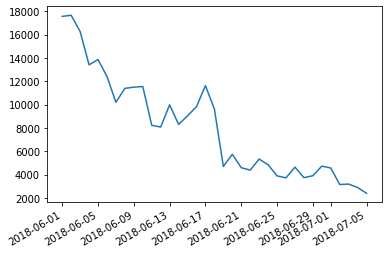

In [23]:
grouped_Customer1.min().SDATE.value_counts().plot()   #用户的第一次购买日期分布，可以看出在7月之后用户增长缓

绘制用户最后一次购买的日期分布图

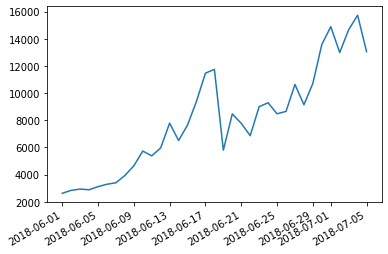

In [24]:
grouped_Customer1.max().SDATE.value_counts().plot()   #用户最后一次购买日期分布,发现用户基本没有流失，也验证了每年销售额的增长趋势

用户第一次购买的时间多集中在6月的上半月，最后一次购买时间多集中与7月份，因此该超市的顾客多为回头客。因此应注重服务质量以及控制零售品价格，以达到挽留更多老顾客的目的。

## 4.3新老顾客占比

([<matplotlib.patches.Wedge at 0x2368fef5f48>,
 [Text(-0.35210934383272846, 1.042122358452061, 'False'),
  Text(0.35210924626219015, -1.0421223914189122, 'True')],
 [Text(-0.19205964209057913, 0.5684303773374877, '60.37%'),
  Text(0.1920595888702855, -0.5684303953194066, '39.63%')])

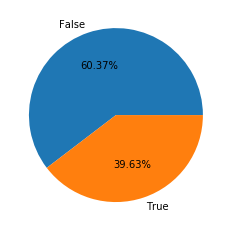

In [25]:
# 统计每个客户第一次和最后一次购买记录
Customer_life = grouped_Customer1.SDATE.agg(['min','max'])
# 查看只有一次购买记录的顾客数量，第一次和最后一次是同一条记录，则说明购买只有一次(这里将一个购物篮看做一个顾客)
(Customer_life['min'] == Customer_life['max']).value_counts()
# 可视化（饼图）
plt.pie((Customer_life['min'] == Customer_life['max']).value_counts(normalize = True),
       autopct='%.2f%%',
       labels = (Customer_life['min'] == Customer_life['max']).value_counts().index)

## 4.4客单价分析

客单价，即平均交易金额，是指平均每个客户交易金额，客单价等于成交金额/成交用户数。<br/>
销售额是由客单价和用户数所决定的，要提升产品的销售额，除了尽可能多地吸引客流，增加顾客交易次数以外，提高客单价也是非常重要的途径。

In [26]:
item2['sales'] = item2['ITEM_QUANTITY']*item2['ITEM_SPEND']
sumPrice=item2['sales'].sum()
countID=item2['SDATE'].count()
avgPrice = sumPrice/countID
print(avgPrice)

319.065685439069


D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 4.5 RFM模型分析

RFM模型根据客户活跃程度和交易金额的贡献，进行客户价值细分的一种方法。<br/>
R（Recency）——最近一次交易时间间隔。基于最近一次交易日期计算的得分，距离当前日期越近，得分越高。如5分制。反映客户交易活跃度。
F（Frequency）——客户在最近一段时间内交易次数。基于交易频率计算的得分，交易频率越高，得分越高。如5分制。反映客户交易活跃度。<br/>
M（Monetray）——客户最近一段时间内交易金额。基于交易金额计算的得分，交易金额越高，得分越高。如5分制。反映客户价值。

In [27]:
# RFM用户分层
rfm = basket2.pivot_table(index = 'BASK_CODE',
                    values = ['STORE_CODE','BASK_SPEND','SHOP_DATETIME'],
                    aggfunc= {'BASK_CODE':'count',
                             'BASK_SPEND':'sum',
                             'SHOP_DATETIME':'max'})

In [28]:
rfm.head()

,BASK_CODE,BASK_SPEND,SHOP_DATETIME
BASK_CODE,,,
961,1,25.0,2018-06-18
962,1,132.1,2018-06-18
964,1,28.0,2018-06-18
965,1,40.0,2018-06-18
966,1,12.5,2018-06-18


In [29]:
rfm['R'] = (rfm.SHOP_DATETIME.max() - rfm.SHOP_DATETIME) / np.timedelta64(1,'D')
rfm.rename(columns={'BASK_CODE':'F','BASK_SPEND':'M'},inplace = True)

In [30]:
rfm

,F,M,SHOP_DATETIME,R
BASK_CODE,,,,
961,1,25.0,2018-06-18,17.0
962,1,132.1,2018-06-18,17.0
964,1,28.0,2018-06-18,17.0
965,1,40.0,2018-06-18,17.0
966,1,12.5,2018-06-18,17.0
...,...,...,...,...
323910,1,9.0,2018-07-05,0.0
323911,1,17.4,2018-07-05,0.0
323912,1,5.9,2018-07-05,0.0


## 建立RFM模型

In [31]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x > 0 else '0')
    label = level.R +level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x : x - x.mean()).apply(rfm_func,axis=1)

In [32]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,24142,390991.43,136245.0
一般保持客户,78408,1245849.52,121598.0
一般发展客户,117098,2568485.95,1965610.0
一般挽留客户,102901,2110018.61,393603.0
重要价值客户,36373,1951109.06,190993.0
重要保持客户,144084,7526893.87,188421.0
重要发展客户,34998,3760221.04,454196.0
重要挽留客户,31793,3000817.29,93646.0


In [33]:
rfm.groupby('label').count()

,F,M,SHOP_DATETIME,R
label,,,,
一般价值客户,7660,7660,7660,7660
一般保持客户,24357,24357,24357,24357
一般发展客户,89623,89623,89623,89623
一般挽留客户,69282,69282,69282,69282
重要价值客户,10875,10875,10875,10875
重要保持客户,39323,39323,39323,39323
重要发展客户,21908,21908,21908,21908
重要挽留客户,17788,17788,17788,17788


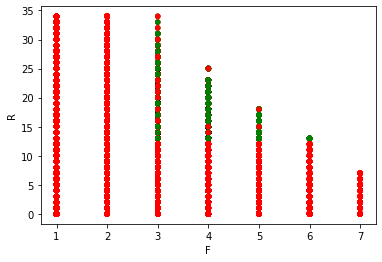

In [34]:
rfm.loc[rfm.label == '重要价值客户','color'] = 'g'
rfm.loc[rfm.label != '重要价值客户','color'] = 'r'
rfm.plot.scatter('F','R',c = rfm.color)

# 5.产品分析

## 5.1最受欢迎产品分析

创建销售量前十的商品代码表

In [35]:
#按商品货号分组，对商品数量进行求和，从大到小进行排序，得到销售量前十的商品
a=item2.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#商店按消费额大小排序
a.head(10)

,PROD_CODE,ITEM_QUANTITY
8527,149413,37718.000
5316,86772,28661.000
17199,220834,24139.000
1478,7133,21673.000
3883,61623,21318.000
7131,124556,18775.000
12010,194690,18119.336
301,1152,17679.000
7129,124554,15717.000
1480,7137,15284.000


由上表可见，最受欢迎的产品为编号149413，对于比较受欢迎的产品，商家应注意及时补货，并摆在比较显眼位置。

## 5.2产品交易额分析

按商品货号分组，对销售金额进行求和，从大到小进行排序，得到交易额前十的商品

In [36]:
#按商品货号分组，对销售金额进行求和，从大到小进行排序，得到交易额前十的商品
item2['sales'] = item2['ITEM_QUANTITY']*item2['ITEM_SPEND']
b=item2.groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
b.head(10)

D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


PROD_CODE
220834    6.570246e+07
149413    5.511544e+07
7137      5.361133e+07
101421    4.113461e+07
11929     3.062564e+07
7133      2.570728e+07
220320    1.659394e+07
199639    1.496307e+07
1157      1.232104e+07
199628    1.165345e+07
Name: sales, dtype: float64

## 5.3产品折扣与销售额分析

In [37]:
c=item2.groupby('DISCOUNT_TYPE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)#销售量按照折扣进行分组并进行大小排序
c

,DISCOUNT_TYPE,ITEM_SPEND
3,n,1.370020e+07
4,p,4.992203e+06
2,m,1.954608e+06
7,v,1.910762e+05
8,x,9.161940e+04
5,q,4.618240e+04
0,Z,2.479515e+04
6,s,9.228600e+02
1,h,2.150000e+01


## 5.4产品折扣与销售量分析

In [38]:
d=item2.groupby('DISCOUNT_TYPE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#销售量按照折扣进行分组并进行大小排序
d

,DISCOUNT_TYPE,ITEM_QUANTITY
3,n,1496483.291
4,p,462191.611
2,m,265343.962
7,v,13264.000
8,x,9687.000
0,Z,2164.472
5,q,1122.000
6,s,224.506
1,h,1.000
